Importing necessary libaries and csv files. I also went ahead and dropped unncessary rows from the data.

In [157]:
import pandas as pd
import numpy as np
from IPython.display import Image
pd.options.plotting.backend = "plotly"

cases = pd.read_csv('../../../../data/stage_2/covid_confirmed_usafacts.csv')
deaths = pd.read_csv('../../../../data/stage_2/covid_deaths_usafacts.csv')

cases = cases.drop(cases.index[cases['countyFIPS'] == 0])
deaths = deaths.drop(deaths.index[deaths['countyFIPS'] == 0])

For the first analysis I went with North Carolina. I used .loc to locate NC specific data. From there we can display COVID cases/deaths for thes state of North Carolina.

In [82]:
nc_cases = cases.loc[cases['State'] == 'NC']
nc_cases = nc_cases.drop(nc_cases.columns[:4], axis=1)

nc_deaths = deaths.loc[deaths['State'] == 'NC']
nc_deaths = nc_deaths.drop(nc_deaths.columns[:4], axis=1)

display(nc_cases.head())
display(nc_deaths.head())

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1924,0,0,0,0,0,0,0,0,0,0,...,19697,19697,19906,19945,20012,20079,20202,20202,20202,20380
1925,0,0,0,0,0,0,0,0,0,0,...,4652,4652,4728,4741,4764,4794,4812,4812,4812,4869
1926,0,0,0,0,0,0,0,0,0,0,...,1117,1117,1127,1132,1132,1134,1138,1138,1138,1143
1927,0,0,0,0,0,0,0,0,0,0,...,2747,2747,2788,2789,2794,2802,2815,2815,2815,2847
1928,0,0,0,0,0,0,0,0,0,0,...,2356,2356,2389,2394,2396,2405,2426,2426,2426,2456


,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1924,0,0,0,0,0,0,0,0,0,0,...,288,288,289,289,289,289,289,289,289,289
1925,0,0,0,0,0,0,0,0,0,0,...,85,85,85,85,85,85,85,85,85,85
1926,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
1927,0,0,0,0,0,0,0,0,0,0,...,57,57,56,56,57,57,57,57,57,57
1928,0,0,0,0,0,0,0,0,0,0,...,45,45,45,45,45,45,45,45,45,45


Calculating new cases/deaths for state of North Carolina.

In [83]:
new_cases = pd.DataFrame()
for column in range(1, 573):
  new_cases[column] = nc_cases.iloc[:,column] - nc_cases.iloc[:,column - 1]

new_cases

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/3858544988.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_cases[column] = nc_cases.iloc[:,column] - nc_cases.iloc[:,column - 1]


,1,2,3,4,5,6,7,8,9,10,...,563,564,565,566,567,568,569,570,571,572
1924,0,0,0,0,0,0,0,0,0,0,...,0,0,209,39,67,67,123,0,0,178
1925,0,0,0,0,0,0,0,0,0,0,...,0,0,76,13,23,30,18,0,0,57
1926,0,0,0,0,0,0,0,0,0,0,...,0,0,10,5,0,2,4,0,0,5
1927,0,0,0,0,0,0,0,0,0,0,...,0,0,41,1,5,8,13,0,0,32
1928,0,0,0,0,0,0,0,0,0,0,...,0,0,33,5,2,9,21,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0,0,0,0,0,0,0,0,0,0,...,0,0,132,25,38,66,46,0,0,119
2020,0,0,0,0,0,0,0,0,0,0,...,0,0,115,40,30,85,59,0,0,111
2021,0,0,0,0,0,0,0,0,0,0,...,0,0,102,19,14,39,31,0,0,75
2022,0,0,0,0,0,0,0,0,0,0,...,0,0,32,17,19,25,20,0,0,59


In [84]:
new_deaths = pd.DataFrame()
for column in range(1, 573):
  new_deaths[column] = nc_deaths.iloc[:,column] - nc_deaths.iloc[:,column - 1]

new_deaths

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/1862499581.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_deaths[column] = nc_deaths.iloc[:,column] - nc_deaths.iloc[:,column - 1]


,1,2,3,4,5,6,7,8,9,10,...,563,564,565,566,567,568,569,570,571,572
1924,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1927,0,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,1,0,0,0,0,0
1928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2021,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we group cases/deaths by week.

In [85]:
weekly_cases = pd.DataFrame()
weekly_cases = new_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

weekly_cases

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
1924,0,0,0,0,0,0,0,0,2,5,...,59,48,40,37,43,89,126,284,338,435
1925,0,0,0,0,0,0,0,0,0,2,...,4,4,16,3,14,21,38,92,120,128
1926,0,0,0,0,0,0,0,0,0,2,...,5,1,7,2,5,1,1,7,20,11
1927,0,0,0,0,0,0,0,0,0,1,...,4,6,6,5,9,18,14,41,68,58
1928,0,0,0,0,0,0,0,0,0,0,...,18,10,7,4,7,5,30,48,51,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0,0,0,0,0,0,0,1,0,3,...,38,24,36,51,76,74,127,179,233,269
2020,0,0,0,0,0,0,0,0,0,2,...,46,19,12,12,18,41,92,192,228,285
2021,0,0,0,0,0,0,0,1,2,10,...,12,27,58,38,39,33,56,92,176,159
2022,0,0,0,0,0,0,0,0,0,3,...,7,7,3,4,10,22,54,121,71,123


In [119]:
weekly_deaths = pd.DataFrame()
weekly_deaths = new_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

weekly_deaths

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
191,0,0,0,0,0,0,0,0,2,5,...,-4,-2,-2,-6,1,2,3,11,6,11
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
194,0,0,0,0,0,0,0,0,0,0,...,1,2,2,3,1,0,1,2,0,1
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,1,2,...,0,3,3,4,3,2,5,6,4,8
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,2,-2,1,0,2,0,0,2
200,0,0,0,0,0,0,0,0,0,0,...,2,6,3,1,1,3,11,2,3,6


Calculating mean/median/mode of cases/deaths in the state of North Carolina.

In [123]:
mean_cases = pd.DataFrame()
mean_cases = pd.DataFrame(week_cases.mean(axis=0).round())
mean_cases.columns = ['NC_Cases_Weekly']

mean_deaths = pd.DataFrame()
mean_deaths = pd.DataFrame(week_deaths.mean(axis=0).round())
mean_deaths.columns = ['NC_Deaths_Weekly']

combined_avg = mean_cases.join(mean_deaths)
combined_avg

,NC_Cases_Weekly,NC_Deaths_Weekly
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,69.0,0.0
78,123.0,0.0
79,233.0,1.0
80,276.0,1.0


In [108]:
combined_avg.mean(axis=0)

NC_Cases_Weekly_avg     136.865854
NC_Deaths_Weekly_avg      1.658537
dtype: float64

In [109]:
combined_avg.mode(axis=0)

,NC_Cases_Weekly_avg,NC_Deaths_Weekly_avg
0,0.0,1.0


In [110]:
combined_avg.median(axis=0)

NC_Cases_Weekly_avg     112.0
NC_Deaths_Weekly_avg      1.0
dtype: float64

Now we repeat the process for the rest of the states. South Carolina, New York, Colorado, Virginia and Texas.

In [142]:
sc_cases = cases.loc[cases['State'] == 'SC']
sc_cases = sc_cases.drop(sc_cases.columns[:4], axis=1)

sc_deaths = deaths.loc[deaths['State'] == 'SC']
sc_deaths = sc_deaths.drop(sc_deaths.columns[:4], axis=1)

sc_new_cases = pd.DataFrame()
for column in range(1, 573):
  sc_new_cases[column] = sc_cases.iloc[:,column] - sc_cases.iloc[:,column - 1]

sc_new_deaths = pd.DataFrame()
for column in range(1, 573):
  sc_new_deaths[column] = sc_deaths.iloc[:,column] - sc_deaths.iloc[:,column - 1]

sc_cases_week = sc_new_cases.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()
sc_death_week = sc_new_deaths.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()

sc_awc = pd.DataFrame(sc_cases_week.mean(axis=0).round())
sc_awc.columns = ['SC_Cases_Weekly']

sc_awd = pd.DataFrame(sc_death_week.mean(axis=0).round())
sc_awd.columns = ['SC_Deaths_Weekly']

sc_combined = sc_awc.join(sc_awd)
sc_combined

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/2587104596.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sc_new_cases[column] = sc_cases.iloc[:,column] - sc_cases.iloc[:,column - 1]
/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/2587104596.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sc_new_deaths[column] = sc_deaths.iloc[:,column] - sc_deaths.iloc[:,column - 1]


,SC_Cases_Weekly,SC_Deaths_Weekly
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,88.0,0.0
78,182.0,1.0
79,330.0,1.0
80,441.0,2.0


In [134]:
sc_combined.mean(axis=0)

SC_Avg_Weekly_Cases     176.926829
SC_Avg_Weekly_Deaths      2.682927
dtype: float64

In [135]:
sc_combined.median(axis=0)

SC_Avg_Weekly_Cases     138.0
SC_Avg_Weekly_Deaths      2.0
dtype: float64

In [136]:
sc_combined.mode(axis=0)

,SC_Avg_Weekly_Cases,SC_Avg_Weekly_Deaths
0,0.0,1.0


In [143]:
ny_cases = cases.loc[cases['State'] == 'NY']
ny_cases = ny_cases.drop(ny_cases.columns[:4], axis=1)

ny_deaths = deaths.loc[deaths['State'] == 'NY']
ny_deaths = ny_deaths.drop(ny_deaths.columns[:4], axis=1)

ny_new_cases = pd.DataFrame()
for column in range(1, 573):
  ny_new_cases[column] = ny_cases.iloc[:,column] - ny_cases.iloc[:,column - 1]

ny_new_deaths = pd.DataFrame()
for column in range(1, 573):
  ny_new_deaths[column] = ny_deaths.iloc[:,column] - ny_deaths.iloc[:,column - 1]

ny_cases_week = ny_new_cases.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()
ny_death_week = ny_new_deaths.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()

ny_awc = pd.DataFrame(ny_cases_week.mean(axis=0).round())
ny_awc.columns = ['NY_Cases_Weekly']

ny_awd = pd.DataFrame(ny_death_week.mean(axis=0).round())
ny_awd.columns = ['NY_Deaths_Weekly']

ny_combined = ny_awc.join(ny_awd)
ny_combined

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/2013360035.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ny_new_cases[column] = ny_cases.iloc[:,column] - ny_cases.iloc[:,column - 1]
/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/2013360035.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ny_new_deaths[column] = ny_deaths.iloc[:,column] - ny_deaths.iloc[:,column - 1]


,NY_Cases_Weekly,NY_Deaths_Weekly
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,123.0,0.0
78,200.0,1.0
79,306.0,1.0
80,422.0,2.0


In [150]:
ny_combined.mean(axis=0)

NY_Cases_Weekly     431.268293
NY_Deaths_Weekly     10.524390
dtype: float64

In [151]:
ny_combined.median(axis=0)

NY_Cases_Weekly     198.0
NY_Deaths_Weekly      3.5
dtype: float64

In [152]:
ny_combined.mode(axis=0)

,NY_Cases_Weekly,NY_Deaths_Weekly
0,0.0,1.0


In [153]:
co_cases = cases.loc[cases['State'] == 'CO']
co_cases = co_cases.drop(co_cases.columns[:4], axis=1)

co_deaths = deaths.loc[deaths['State'] == 'CO']
co_deaths = co_deaths.drop(co_deaths.columns[:4], axis=1)

co_new_cases = pd.DataFrame()
for column in range(1, 573):
  co_new_cases[column] = co_cases.iloc[:,column] - co_cases.iloc[:,column - 1]

co_new_deaths = pd.DataFrame()
for column in range(1, 573):
  co_new_deaths[column] = co_deaths.iloc[:,column] - co_deaths.iloc[:,column - 1]

co_cases_week = co_new_cases.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()
co_death_week = co_new_deaths.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()

co_awc = pd.DataFrame(co_cases_week.mean(axis=0).round())
co_awc.columns = ['CO_Cases_Weekly']

co_awd = pd.DataFrame(co_death_week.mean(axis=0).round())
co_awd.columns = ['CO_Deaths_Weekly']

co_combined = co_awc.join(co_awd)
co_combined

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/3144852909.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  co_new_cases[column] = co_cases.iloc[:,column] - co_cases.iloc[:,column - 1]
/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/3144852909.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  co_new_deaths[column] = co_deaths.iloc[:,column] - co_deaths.iloc[:,column - 1]


,CO_Cases_Weekly,CO_Deaths_Weekly
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,57.0,0.0
78,64.0,0.0
79,116.0,1.0
80,112.0,1.0


In [154]:
co_combined.mean(axis=0)

CO_Cases_Weekly     112.817073
CO_Deaths_Weekly      1.304878
dtype: float64

In [155]:
co_combined.median(axis=0)

CO_Cases_Weekly     62.5
CO_Deaths_Weekly     1.0
dtype: float64

In [156]:
co_combined.mode(axis=0)

,CO_Cases_Weekly,CO_Deaths_Weekly
0,0.0,1.0


In [158]:
va_cases = cases.loc[cases['State'] == 'VA']
va_cases = va_cases.drop(va_cases.columns[:4], axis=1)

va_deaths = deaths.loc[deaths['State'] == 'VA']
va_deaths = va_deaths.drop(va_deaths.columns[:4], axis=1)

va_new_cases = pd.DataFrame()
for column in range(1, 573):
  va_new_cases[column] = va_cases.iloc[:,column] - va_cases.iloc[:,column - 1]

va_new_deaths = pd.DataFrame()
for column in range(1, 573):
  va_new_deaths[column] = va_deaths.iloc[:,column] - va_deaths.iloc[:,column - 1]

va_cases_week = va_new_cases.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()
va_death_week = va_new_deaths.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()

va_awc = pd.DataFrame(va_cases_week.mean(axis=0).round())
va_awc.columns = ['VA_Cases_Weekly']

va_awd = pd.DataFrame(va_death_week.mean(axis=0).round())
va_awd.columns = ['VA_Deaths_Weekly']

va_combined = va_awc.join(va_awd)
va_combined

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/1854635202.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  va_new_cases[column] = va_cases.iloc[:,column] - va_cases.iloc[:,column - 1]
/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/1854635202.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  va_new_deaths[column] = va_deaths.iloc[:,column] - va_deaths.iloc[:,column - 1]


,VA_Cases_Weekly,VA_Deaths_Weekly
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,25.0,0.0
78,39.0,0.0
79,67.0,0.0
80,91.0,0.0


In [159]:
va_combined.mean(axis=0)

VA_Cases_Weekly     66.353659
VA_Deaths_Weekly     1.085366
dtype: float64

In [160]:
va_combined.median(axis=0)

VA_Cases_Weekly     49.5
VA_Deaths_Weekly     1.0
dtype: float64

In [161]:
va_combined.mode(axis=0)

,VA_Cases_Weekly,VA_Deaths_Weekly
0,0.0,1.0


In [162]:
tx_cases = cases.loc[cases['State'] == 'TX']
tx_cases = tx_cases.drop(tx_cases.columns[:4], axis=1)

tx_deaths = deaths.loc[deaths['State'] == 'TX']
tx_deaths = tx_deaths.drop(tx_deaths.columns[:4], axis=1)

tx_new_cases = pd.DataFrame()
for column in range(1, 573):
  tx_new_cases[column] = tx_cases.iloc[:,column] - tx_cases.iloc[:,column - 1]

tx_new_deaths = pd.DataFrame()
for column in range(1, 573):
  tx_new_deaths[column] = tx_deaths.iloc[:,column] - tx_deaths.iloc[:,column - 1]

tx_cases_week = tx_new_cases.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()
tx_death_week = tx_new_deaths.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()

tx_awc = pd.DataFrame(tx_cases_week.mean(axis=0).round())
tx_awc.columns = ['TX_Cases_Weekly']

tx_awd = pd.DataFrame(tx_death_week.mean(axis=0).round())
tx_awd.columns = ['TX_Deaths_Weekly']

tx_combined = tx_awc.join(tx_awd)
tx_combined

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/1595590663.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  tx_new_cases[column] = tx_cases.iloc[:,column] - tx_cases.iloc[:,column - 1]
/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/1595590663.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  tx_new_deaths[column] = tx_deaths.iloc[:,column] - tx_deaths.iloc[:,column - 1]


,TX_Cases_Weekly,TX_Deaths_Weekly
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,101.0,1.0
78,190.0,1.0
79,307.0,1.0
80,382.0,2.0


In [167]:
tx_combined.mean(axis=0)

TX_Cases_Weekly     159.853659
TX_Deaths_Weekly      2.573171
dtype: float64

In [168]:
tx_combined.median(axis=0)

TX_Cases_Weekly     111.5
TX_Deaths_Weekly      2.0
dtype: float64

In [169]:
tx_combined.mode(axis=0)

,TX_Cases_Weekly,TX_Deaths_Weekly
0,0.0,1.0


Now we can begin normalizing by population. From there I concat all elements into one graph and display the graph.

In [205]:
nc_normalizaton = population.loc[population['State'] == 'NC']
nc_tp = nc_normalization['population'].sum()
nc_normalized_cases = (mean_cases / nc_tp) * 100000
nc_normalized_deaths = (mean_deaths / ny_tp) * 100000

sc_normalization = population.loc[population['State'] == 'SC']
sc_tp = sc_normalization['population'].sum()
sc_normalized_cases = (sc_awc / sc_tp) * 100000
sc_normalized_deaths = (sc_awd / sc_tp) * 100000

ny_normalization = population.loc[population['State'] == 'NY']
ny_tp = ny_normalization['population'].sum()
ny_normalized_cases = (ny_awc / ny_tp) * 100000
ny_normalized_deaths = (ny_awd / ny_tp) * 100000

co_normalization = population.loc[population['State'] == 'CO']
co_tp = co_normalization['population'].sum()
co_normalized_cases = (co_awc / co_tp) * 100000
co_normalized_deaths = (co_awd / co_tp) * 100000

va_normalization = population.loc[population['State'] == 'VA']
va_tp = va_normalization['population'].sum()
va_normalized_cases = (va_awc / va_tp) * 100000
va_normalized_deaths = (va_awd / va_tp) * 100000

tx_normalization = population.loc[population['State'] == 'TX']
tx_tp = tx_normalization['population'].sum()
tx_normalized_cases = (tx_awc / tx_tp) * 100000
tx_normalized_deaths = (tx_awd / tx_tp) * 100000


NameError: name 'nc_normalization' is not defined

In [203]:
normalized_cd = pd.concat([nc_normalized_cases, sc_normalized_cases, 
                              ny_normalized_cases, co_normalized_cases, 
                              va_normalized_cases, tx_normalized_cases, nc_normalized_deaths, sc_normalized_deaths, 
                               ny_normalized_deaths, co_normalized_deaths, 
                               va_normalized_deaths, tx_normalized_deaths], axis=1)
normalized_cd.columns = ['NC_cases', 'SC_cases', 'NY_cases', 
                            'CO_cases', 'VA_cases', 'TX_cases', 'NC_deaths', 'SC_deaths', 'NY_deaths', 'CO_deaths', 
                            'VA_deaths', 'TX_deaths']

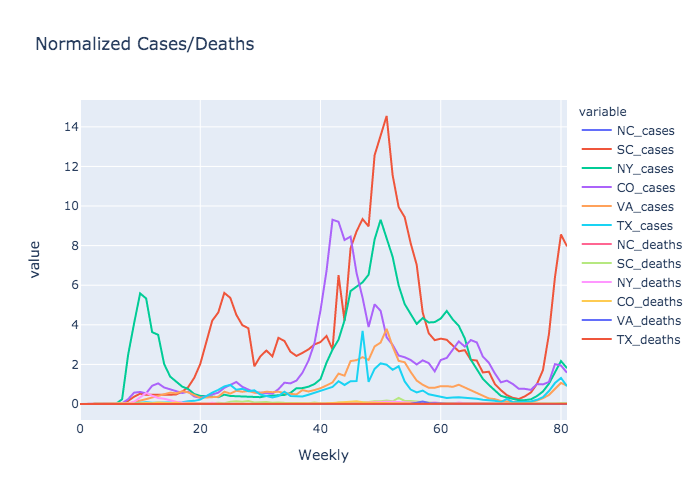

In [204]:
normalized_cd.index.names = ['Weekly ']
fig = normalized_cd.plot(kind='line', title='Normalized Cases/Deaths')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

State Analysis: As we see from the graph above, rates will differ depending on many factors. For example, it would deem reasonable that states with larger populations see a higher number of cases. Another factor could be vaccination rates, states with higher vaccination rates will see a slower increase in cases compared to states with lower vaccination rate. There does seem to be peaks during winter/holiday months which make sense due to the increase in gatherings. Another reason for the surge during the summer months could be due to the rising delta variant at the time or children returning to school.

Now we can begin our county analysis. I decided to choose 5 counties from North Carolina. Per google, the 5 counties with high cases/deaths in North Carolina are: Wake County, Mecklenburg County, Guilford County, Forsyth County and Cumberland County. 

In [240]:
wake_county_cases = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
wake_county_cases = wake_county_cases.drop(wake_county_cases.index[wake_county_cases['countyFIPS'] != 37183])
wake_county_cases = wake_county_cases.drop(wake_county_cases.iloc[:, 0:4], axis=1)

wake_county_deaths = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
wake_county_deaths = wake_county_deaths.drop(wake_county_deaths.index[wake_county_deaths['countyFIPS'] != 37183])
wake_county_deaths = wake_county_deaths.drop(wake_county_deaths.iloc[:, 0:4], axis=1)

new_wake_county_cases = pd.DataFrame()

for column in range(1,573):
  new_wake_county_cases[column] = wake_county_cases.iloc[:,column] - wake_county_cases.iloc[:,column-1] 

new_wake_county_deaths = pd.DataFrame()

for column in range(1,573):
  new_wake_county_deaths[column] = wake_county_deaths.iloc[:,column] - wake_county_deaths.iloc[:,column-1] 

weekly_wake_county_cases = pd.DataFrame()
weekly_wake_county_cases = new_wake_county_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
weekly_wake_county_deaths = pd.DataFrame()
weekly_wake_county_deaths = new_wake_county_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_wake_county_cases = pd.DataFrame()
avg_wake_county_cases = pd.DataFrame(weekly_wake_county_cases.mean(axis=0).round())
avg_wake_county_cases.columns = ['Average_Cases']
avg_wake_county_deaths = pd.DataFrame()
avg_wake_county_deaths = pd.DataFrame(weekly_wake_county_deaths.mean(axis=0).round())
avg_wake_county_deaths.columns = ['Average_Deaths']

merged_avg_wake_county = avg_wake_county_cases.join(avg_wake_county_deaths)

merged_avg_wake_county_log = pd.DataFrame()
merged_avg_wake_county_log['Average_Cases'] = merged_avg_wake_county['Average_Cases'].apply(lambda x: np.log(x))
merged_avg_wake_county_log['Average_Deaths'] = merged_avg_wake_county['Average_Deaths'].apply(lambda x: np.log(x))

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/3331502421.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/3331502421.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



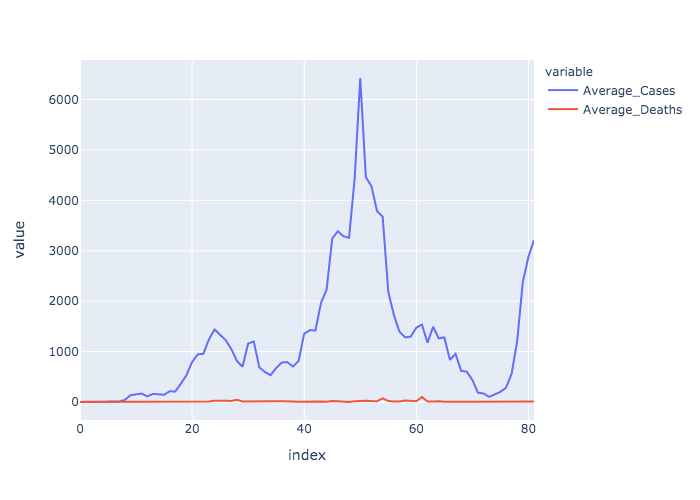

In [243]:
wake_county_graph = merged_avg_wake_county.plot(kind='line')
wake_county_graph = wake_county_graph.to_image(format='png')

Image(wake_county_graph)

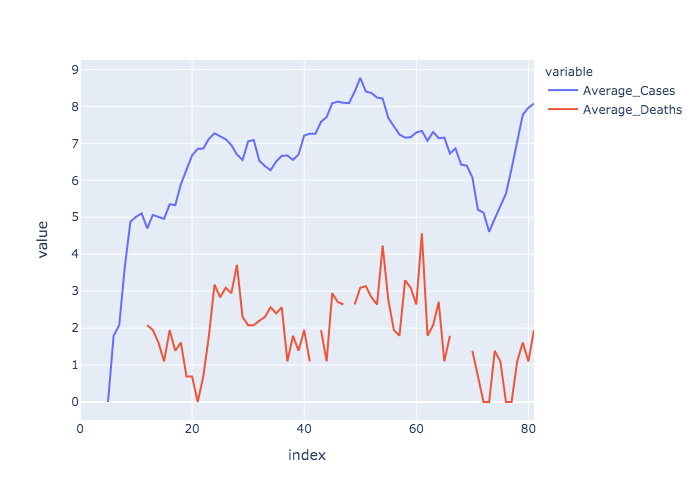

In [242]:
wake_county_log = merged_avg_wake_county_log.plot(kind='line')
wake_county_log = wake_county_log.to_image(format='png')

Image(wake_county_log)

In [263]:
mecklenburg_county_cases = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
mecklenburg_county_cases = mecklenburg_county_cases.drop(mecklenburg_county_cases.index[mecklenburg_county_cases['countyFIPS'] != 37119])
mecklenburg_county_cases = mecklenburg_county_cases.drop(mecklenburg_county_cases.iloc[:, 0:4], axis=1)

mecklenburg_county_deaths = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
mecklenburg_county_deaths = mecklenburg_county_deaths.drop(mecklenburg_county_deaths.index[mecklenburg_county_deaths['countyFIPS'] != 37119])
mecklenburg_county_deaths = mecklenburg_county_deaths.drop(mecklenburg_county_deaths.iloc[:, 0:4], axis=1)

new_mecklenburg_county_cases = pd.DataFrame()

for column in range(1,573):
  new_mecklenburg_county_cases[column] = mecklenburg_county_cases.iloc[:,column] - mecklenburg_county_cases.iloc[:,column-1] 

new_mecklenburg_county_deaths = pd.DataFrame()

for column in range(1,573):
  new_mecklenburg_county_deaths[column] = mecklenburg_county_deaths.iloc[:,column] - mecklenburg_county_deaths.iloc[:,column-1] 

weekly_mecklenburg_county_cases = pd.DataFrame()
weekly_mecklenburg_county_cases = new_mecklenburg_county_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
weekly_mecklenburg_county_deaths = pd.DataFrame()
weekly_mecklenburg_county_deaths = new_mecklenburg_county_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_mecklenburg_county_cases = pd.DataFrame()
avg_mecklenburg_county_cases = pd.DataFrame(weekly_mecklenburg_county_cases.mean(axis=0).round())
avg_mecklenburg_county_cases.columns = ['Average_Cases']
avg_mecklenburg_county_deaths = pd.DataFrame()
avg_mecklenburg_county_deaths = pd.DataFrame(weekly_mecklenburg_county_deaths.mean(axis=0).round())
avg_mecklenburg_county_deaths.columns = ['Average_Deaths']

merged_avg_mecklenburg_county = avg_mecklenburg_county_cases.join(avg_mecklenburg_county_deaths)

merged_avg_mecklenburg_county_log = pd.DataFrame()
merged_avg_mecklenburg_county_log['Average_Cases'] = merged_avg_mecklenburg_county['Average_Deaths'].apply(lambda x: np.log(x))
merged_avg_mecklenburg_county_log['Average_Cases'] = merged_avg_mecklenburg_county['Average_Deaths'].apply(lambda x: np.log(x))

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/119180652.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/119180652.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



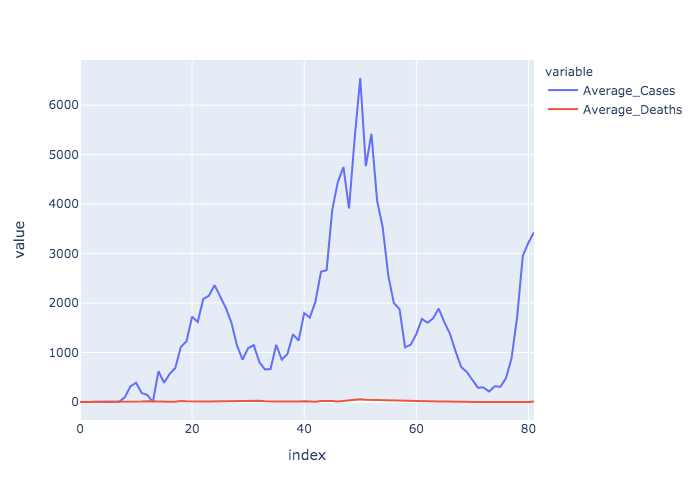

In [264]:
mecklenburg_county_graph = merged_avg_mecklenburg_county.plot(kind='line')
mecklenburg_county_graph = mecklenburg_county_graph.to_image(format='png')

Image(mecklenburg_county_graph)

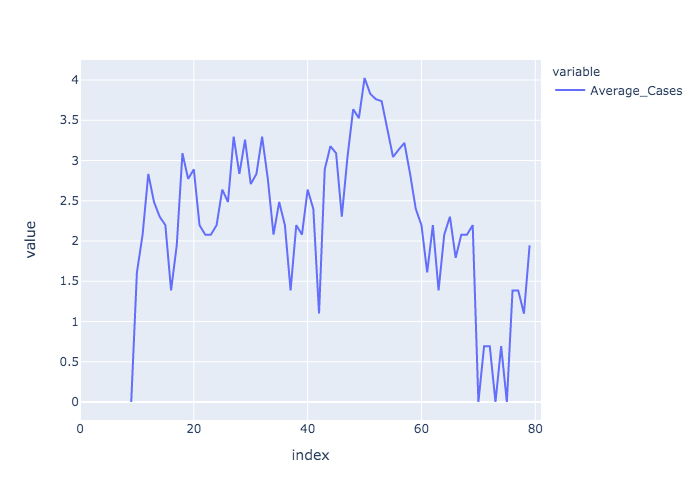

In [266]:
mecklenburg_county_log = merged_avg_mecklenburg_county_log.plot(kind='line')
mecklenburg_county_log = mecklenburg_county_log.to_image(format='png')

Image(mecklenburg_county_log)

In [260]:
guilford_county_cases = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
guilford_county_cases = guilford_county_cases.drop(guilford_county_cases.index[guilford_county_cases['countyFIPS'] != 37081])
guilford_county_cases = guilford_county_cases.drop(guilford_county_cases.iloc[:, 0:4], axis=1)

guilford_county_deaths = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
guilford_county_deaths = guilford_county_deaths.drop(guilford_county_deaths.index[guilford_county_deaths['countyFIPS'] != 37081])
guilford_county_deaths = guilford_county_deaths.drop(guilford_county_deaths.iloc[:, 0:4], axis=1)

new_guilford_county_cases = pd.DataFrame()

for column in range(1,573):
  new_guilford_county_cases[column] = guilford_county_cases.iloc[:,column] - guilford_county_cases.iloc[:,column-1] 

new_guilford_county_deaths = pd.DataFrame()

for column in range(1,573):
  new_guilford_county_deaths[column] = guilford_county_deaths.iloc[:,column] - guilford_county_deaths.iloc[:,column-1] 

weekly_guilford_county_cases = pd.DataFrame()
weekly_guilford_county_cases = new_guilford_county_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
weekly_guilford_county_deaths = pd.DataFrame()
weekly_guilford_county_deaths = new_guilford_county_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_guilford_county_cases = pd.DataFrame()
avg_guilford_county_cases = pd.DataFrame(weekly_guilford_county_cases.mean(axis=0).round())
avg_guilford_county_cases.columns = ['Average_Cases']
avg_guilford_county_deaths = pd.DataFrame()
avg_guilford_county_deaths = pd.DataFrame(weekly_guilford_county_deaths.mean(axis=0).round())
avg_guilford_county_deaths.columns = ['Average_Deaths']

merged_avg_guilford_county = avg_guilford_county_cases.join(avg_guilford_county_deaths)

merged_avg_guilford_county_log = pd.DataFrame()
merged_avg_guilford_county_log['Average_Cases'] = merged_avg_guilford_county['Average_Cases'].apply(lambda x: np.log(x))
merged_avg_guilford_county_log['Average_Deaths'] = merged_avg_guilford_county['Average_Deaths'].apply(lambda x: np.log(x))

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/4239811363.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/4239811363.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



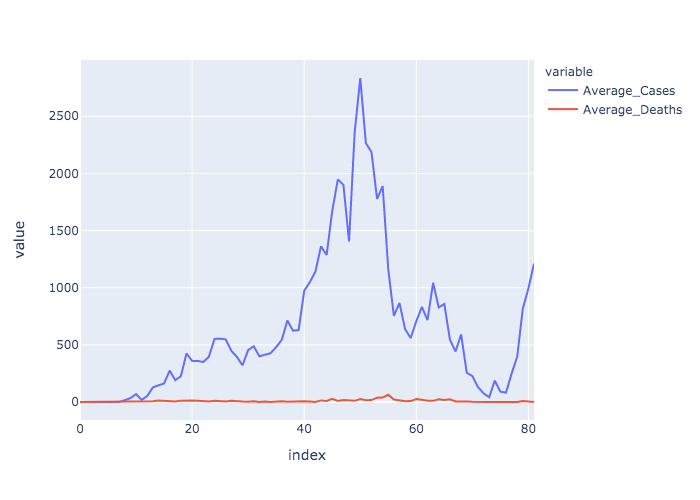

In [261]:
guilford_county_graph = merged_avg_guilford_county.plot(kind='line')
guilford_county_graph = guilford_county_graph.to_image(format='png')

Image(guilford_county_graph)

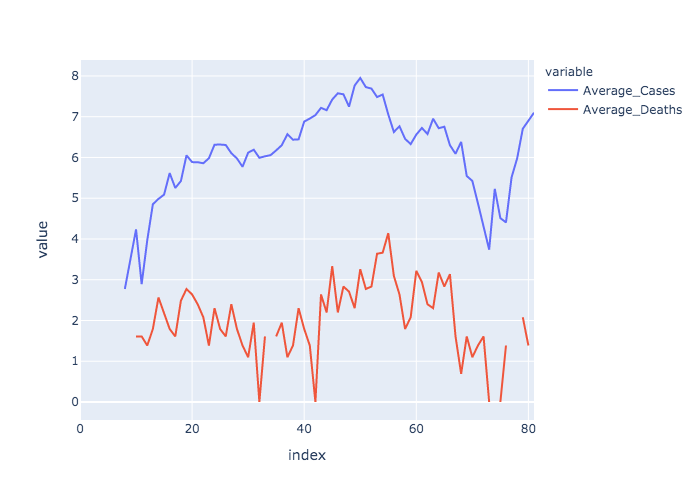

In [262]:
guilford_county_log = merged_avg_guilford_county_log.plot(kind='line')
guilford_county_log = guilford_county_log.to_image(format='png')

Image(guilford_county_log)

In [257]:
forsyth_county_cases = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
forsyth_county_cases = forsyth_county_cases.drop(forsyth_county_cases.index[forsyth_county_cases['countyFIPS'] != 37067])
forsyth_county_cases = forsyth_county_cases.drop(forsyth_county_cases.iloc[:, 0:4], axis=1)

forsyth_county_deaths = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
forsyth_county_deaths = forsyth_county_deaths.drop(forsyth_county_deaths.index[forsyth_county_deaths['countyFIPS'] != 37067])
forsyth_county_deaths = forsyth_county_deaths.drop(forsyth_county_deaths.iloc[:, 0:4], axis=1)

new_forsyth_county_cases = pd.DataFrame()

for column in range(1,573):
  new_forsyth_county_cases[column] = forsyth_county_cases.iloc[:,column] - forsyth_county_cases.iloc[:,column-1] 

new_forsyth_county_deaths = pd.DataFrame()

for column in range(1,573):
  new_forsyth_county_deaths[column] = forsyth_county_deaths.iloc[:,column] - forsyth_county_deaths.iloc[:,column-1] 

weekly_forsyth_county_cases = pd.DataFrame()
weekly_forsyth_county_cases = new_forsyth_county_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
weekly_forsyth_county_deaths = pd.DataFrame()
weekly_forsyth_county_deaths = new_forsyth_county_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_forsyth_county_cases = pd.DataFrame()
avg_forsyth_county_cases = pd.DataFrame(weekly_forsyth_county_cases.mean(axis=0).round())
avg_forsyth_county_cases.columns = ['Average_Cases']
avg_forsyth_county_deaths = pd.DataFrame()
avg_forsyth_county_deaths = pd.DataFrame(weekly_forsyth_county_deaths.mean(axis=0).round())
avg_forsyth_county_deaths.columns = ['Average_Deaths']

merged_avg_forsyth_county = avg_forsyth_county_cases.join(avg_forsyth_county_deaths)

merged_avg_forsyth_county_log = pd.DataFrame()
merged_avg_forsyth_county_log['Average_Cases'] = merged_avg_forsyth_county['Average_Cases'].apply(lambda x: np.log(x))
merged_avg_forsyth_county_log['Average_Deaths'] = merged_avg_forsyth_county['Average_Deaths'].apply(lambda x: np.log(x))

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/3154442056.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/3154442056.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



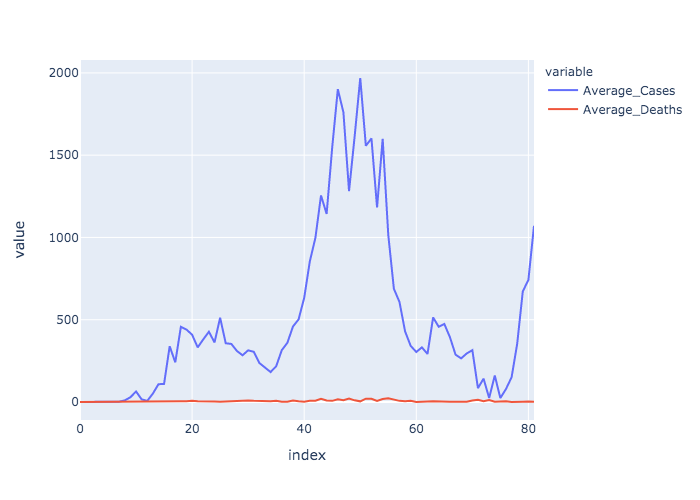

In [258]:
forsyth_county_graph = merged_avg_forsyth_county.plot(kind='line')
forsyth_county_graph = forsyth_county_graph.to_image(format='png')

Image(forsyth_county_graph)

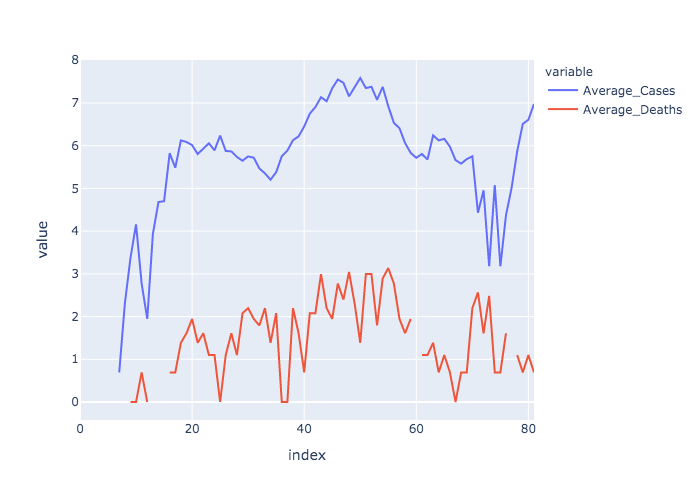

In [259]:
forsyth_county_log = merged_avg_forsyth_county_log.plot(kind='line')
forsyth_county_log = forsyth_county_log.to_image(format='png')

Image(forsyth_county_log)

In [254]:
cumberland_county_cases = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
cumberland_county_cases = cumberland_county_cases.drop(cumberland_county_cases.index[cumberland_county_cases['countyFIPS'] != 37051])
cumberland_county_cases = cumberland_county_cases.drop(cumberland_county_cases.iloc[:, 0:4], axis=1)

cumberland_county_deaths = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
cumberland_county_deaths = cumberland_county_deaths.drop(cumberland_county_deaths.index[cumberland_county_deaths['countyFIPS'] != 37051])
cumberland_county_deaths = cumberland_county_deaths.drop(cumberland_county_deaths.iloc[:, 0:4], axis=1)

new_cumberland_county_cases = pd.DataFrame()

for column in range(1,573):
  new_cumberland_county_cases[column] = cumberland_county_cases.iloc[:,column] - cumberland_county_cases.iloc[:,column-1] 

new_cumberland_county_deaths = pd.DataFrame()

for column in range(1,573):
  new_cumberland_county_deaths[column] = cumberland_county_deaths.iloc[:,column] - cumberland_county_deaths.iloc[:,column-1] 

weekly_cumberland_county_cases = pd.DataFrame()
weekly_cumberland_county_cases = new_cumberland_county_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
weekly_cumberland_county_deaths = pd.DataFrame()
weekly_cumberland_county_deaths = new_cumberland_county_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

avg_cumberland_county_cases = pd.DataFrame()
avg_cumberland_county_cases = pd.DataFrame(weekly_cumberland_county_cases.mean(axis=0).round())
avg_cumberland_county_cases.columns = ['Average_Cases']
avg_cumberland_county_deaths = pd.DataFrame()
avg_cumberland_county_deaths = pd.DataFrame(weekly_cumberland_county_deaths.mean(axis=0).round())
avg_cumberland_county_deaths.columns = ['Average_Deaths']

merged_avg_cumberland_county = avg_cumberland_county_cases.join(avg_cumberland_county_deaths)

merged_avg_cumberland_county_log = pd.DataFrame()
merged_avg_cumberland_county_log['Average_Cases'] = merged_avg_cumberland_county['Average_Cases'].apply(lambda x: np.log(x))
merged_avg_cumberland_county_log['Average_Deaths'] = merged_avg_cumberland_county['Average_Deaths'].apply(lambda x: np.log(x))

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/3943593290.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/pz/ly7kn_d97bn26dx8nnmnj5dc0000gn/T/ipykernel_26840/3943593290.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



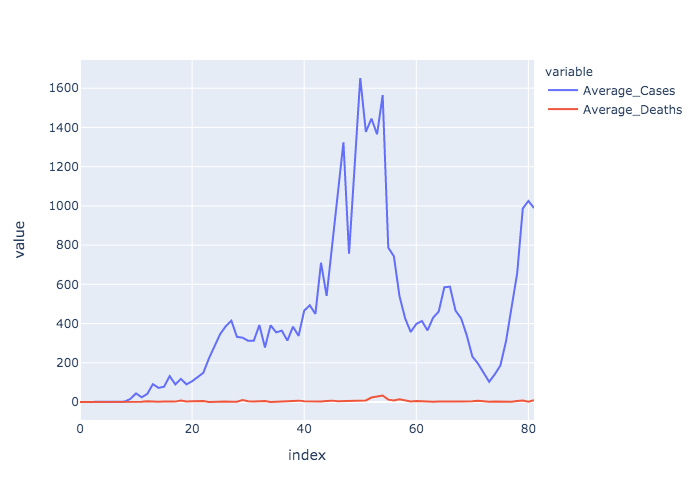

In [255]:
cumberland_county_graph = merged_avg_cumberland_county.plot(kind='line')
cumberland_county_graph = cumberland_county_graph.to_image(format='png')

Image(cumberland_county_graph)

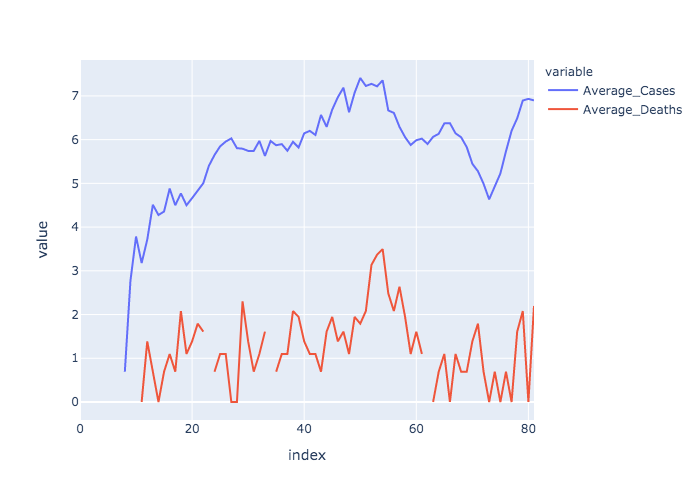

In [256]:
cumberland_county_log = merged_avg_cumberland_county_log.plot(kind='line')
cumberland_county_log = cumberland_county_log.to_image(format='png')

Image(cumberland_county_log)

Overall it does seem clear that the county trends follow the state trends. Which makes sense when you consider that the counties that have the highest cases mainly correlate with the most populated counties therefore making the trend more apparent. Just like overall US cases, it is clear that there was a peak during the winter/holiday months. This is likely due to holiday gatherings/celebrations. There is also another peak towards the end of summer which is likely caused by the delta variant and children returning to school.